### Cloning git repo

In [0]:
!git clone -l -s https://github.com/WING-NUS/scisumm-corpus.git
%cd scisumm-corpus/data/Training-Set-2019/Task1/From-Training-Set-2018/
X = !ls

fatal: destination path 'scisumm-corpus' already exists and is not an empty directory.
/content/scisumm-corpus1/data/Training-Set-2019/Task1/From-Training-Set-2018/scisumm-corpus/data/Training-Set-2019/Task1/From-Training-Set-2018


## Loading Data

In [0]:
import re
files = []
print(X)
for file in X:
  Y = re.split(r'[ ,\t]', file)
  files += [y for y in Y if y!=""]

print(len(files))

['C00-2123  C90-2039  D10-1083  I05-5011\tN04-1038  P05-1004  P98-1081  W08-2222', 'C02-1025  C94-2154  E03-1020  J00-3003\tN06-2049  P05-1053  P98-2143  W09-0621', 'C04-1089  C98-1097  E09-2008  J96-3004\tN09-1001  P06-2124  W03-0410  W11-0815', 'C08-1098  D09-1023  H05-1115  J98-2005\tN09-1025  P07-1040  W04-0213  W95-0104', 'C10-1045  D10-1058  H89-2014  N01-1011\tP00-1025  P98-1046  W06-3909  X96-1048']
40


### Feature Extraction

In [0]:
from collections import defaultdict
import numpy as np
DataDict = defaultdict(lambda: {"C_text": str, "R_text": str , "Discourse_facet" : str})
c = 0
featureDict = {}
for rfile in files:
  try :
    open_file = open(rfile+"/annotation/"+rfile+".ann.txt", 'r')
  except:
    open_file = open(rfile+"/annotation/"+rfile+".annv3.txt", 'r')
  citances = open_file.readlines()
  citanceNumber = 0
  for citance in citances:
    citanceNumber = citanceNumber + 1
    if len(citance) > 1:
      data_file = citance.split(" | ")
      if(len(data_file) == 11):
        C_text = (data_file[6].split(":")[1])
        R_text = (data_file[8].split(":")[1])
        DataDict[data_file[1].split(":")[1]]["C_text"] = " ".join(C_text)
        DataDict[data_file[1].split(":")[1]]["R_text"] = " ".join(R_text)
        sentencepos = []
        sectionpos = []
        # Five facets 
        #  Aim, Hypothesis, Implication, Results, Method 
        mat = []
        C_textb = C_text.split("</S>")
        for entry in C_textb:
          if entry.find(">") != -1 :
            temp = entry.split(">")[0]  
            temp2 = temp.split("=")[1]
            temp3 = temp.split("=")[2]
            sentencepos.append((int)(temp2.split("\"")[1]))
            sectionpos.append((int)(temp3.split("\"")[1]))
        if len(sentencepos)<2  :
          sentencepos.append(0)
          sectionpos.append(0)
        for i in range(2) :
          vec = []
          vec.append(sentencepos[i])
          vec.append(sectionpos[i])
          mat.append(vec)
        mat = np.array(mat)
        mat = np.reshape(mat,(4,))
        featureDict[(rfile,citanceNumber)]=mat

        if(c==0):
          c=1;
print(featureDict)

{('C00-2123', 1): array([39, 19, 40, 20]), ('C00-2123', 4): array([8, 8, 0, 0]), ('C00-2123', 7): array([43,  1,  0,  0]), ('C00-2123', 10): array([80, 38,  0,  0]), ('C00-2123', 13): array([22, 22,  0,  0]), ('C00-2123', 15): array([21, 21, 22, 22]), ('C00-2123', 18): array([113,  16,   0,   0]), ('C00-2123', 21): array([115,  73, 117,  75]), ('C00-2123', 24): array([35, 35,  0,  0]), ('C00-2123', 27): array([282,  48,   0,   0]), ('C00-2123', 30): array([16, 16,  0,  0]), ('C00-2123', 33): array([127,  34,   0,   0]), ('C00-2123', 36): array([113,  22,   0,   0]), ('C00-2123', 39): array([120,  29,   0,   0]), ('C00-2123', 42): array([5, 5, 0, 0]), ('C00-2123', 45): array([110,  26,   0,   0]), ('C00-2123', 48): array([47, 23,  0,  0]), ('C00-2123', 51): array([61, 19, 62, 20]), ('C90-2039', 1): array([48, 28,  0,  0]), ('C90-2039', 4): array([102,  67, 103,  68]), ('C90-2039', 7): array([49,  9,  0,  0]), ('C90-2039', 10): array([62, 22,  0,  0]), ('C90-2039', 13): array([49, 29,  0

## Models trained using only positional features

In [0]:
X = []
y = []
cnt = 0
for rfile in files:
  try :
    open_file = open(rfile+"/annotation/"+rfile+".ann.txt", 'r')
  except:
    open_file = open(rfile+"/annotation/"+rfile+".annv3.txt", 'r')
  citances = open_file.readlines()
  for citance in citances:
    if len(citance) > 1:
      data_file = citance.split(" | ")
      if(len(data_file) == 11):
        R_text = (data_file[8].split(":")[1])
        Facet = (data_file[9].split(":")[1])
        result = R_text.find('sid') 
        temp = (R_text[result:result+10])
        t1 = temp.split('"')[1]
        # print(t1)
        result = R_text.find('ssid') 
        temp = (R_text[result:result+11])
        t2 = 0
        try:
          t2 = temp.split('"')[1]
        except:
          t2 = 0
        # print(t2)
        t = [int(t1), int(t2)]
        # print(t)
        X.append(t)
        g = 0
        if (Facet.find('Result') != -1):
          g = 2
        elif (Facet.find('Aim') != -1):
          g = 3
        elif (Facet.find('Hypothesis') != -1):
          g = 4
        elif (Facet.find('Implication') != -1):
          g = 5
        elif (Facet.find('Method') != -1):
          g = 1
        
        y.append(g)
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 1, 1, 3, 5, 3, 5, 1, 1, 1, 5, 2, 1, 1, 5, 3, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 5, 3, 5, 5, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 2, 5, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 5, 5, 1, 1, 2, 2, 2, 1, 5, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 5, 1, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 2, 5, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 1, 1, 1, 5, 1, 2, 1, 5, 2, 1, 2, 1, 1, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 2, 3, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## Plot of number of citance in each discourse facet

<BarContainer object of 5 artists>

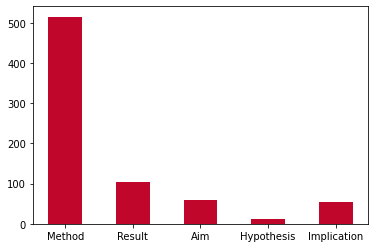

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support


# print(cd2)
newdict = {'Method':0,'Result':0,'Aim':0,'Hypothesis':0,'Implication':0}
for i in y:  
    if (i == 1):
      newdict['Method'] += 1
    elif (i == 2 ):
      newdict['Result'] += 1
    elif (i == 3):
      newdict['Aim'] += 1
    elif (i == 4):
      newdict['Hypothesis'] += 1
    elif (i == 5):
      newdict['Implication'] += 1

plt.figure()
plt.bar(newdict.keys(), newdict.values(),0.5, color='#C1062B')

<BarContainer object of 2 artists>

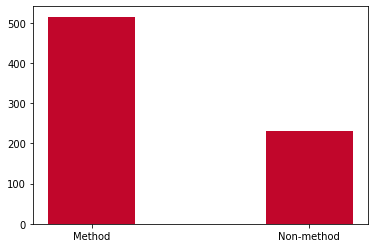

In [0]:
import matplotlib.pyplot as plt


# print(cd2)
newdict = {'Method':0,'Non-method':0}
for i in y:  
    if (i == 1):
      newdict['Method'] += 1
    else:
      newdict['Non-method'] += 1

plt.figure()
plt.bar(newdict.keys(), newdict.values(),0.4, color='#C1062B')

## Binary Classifiers
These classifiers will separate method_citation from non-methods one.

In [0]:
y_multi_class = y
y = []
for i in y_multi_class:
  if(i != 1):
    y.append(0)
  else:
    y.append(1)
print(y)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

1) Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
import numpy as np
from imblearn.metrics import classification_report_imbalanced
X = np.array(X)
y = np.array(y)
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print(X_train.shape,y_test.shape)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred, normalize=False))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

(596, 2) (149,)
106
(0.7114093959731543, 0.7114093959731543, 0.7114093959731543, None)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


2)SVM

In [0]:
from sklearn.svm import LinearSVC
weights = {0:1, 1:1.0}
clf = LinearSVC(random_state=0, tol=1e-5, max_iter = 1000000,class_weight = weights)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print(X_train.shape,y_test.shape)
clf.fit(X_train, y_train)
print(accuracy_score(y_test, y_pred, normalize=False))
y_pred = clf.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

(596, 2) (149,)
106
(0.6912751677852349, 0.6912751677852349, 0.6912751677852349, None)


3)Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
binary_model = RandomForestClassifier(n_estimators=1000)
binary_model.fit(X_train , y_train)
y_pred = binary_model.predict(X_test)
target_names = [0, 1]
print(binary_model.score(X_test,y_test))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))


0.7315436241610739
(0.7315436241610739, 0.7315436241610739, 0.7315436241610739, None)


In [0]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# define model
weights = {0:2, 1:1}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
model.fit(X_train,y_train)
model.score(X_test,y_test)
y_pred = model.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))


(0.6577181208053692, 0.6577181208053692, 0.6577181208053692, None)


In [0]:
i_class0 = np.where(y_train == 0)[0]
i_class1 = np.where(y_train == 1)[0]
n_class0 = len(i_class0)
n_class1 = len(i_class1)
print(n_class0,n_class1)
# For every observation of class 0, randomly sample from class 1 without replacement
i_class1_downsampled = np.random.choice(i_class1, size=n_class0, replace=False)
downsampled = np.concatenate((i_class1_downsampled ,i_class0))
X_train_downsampled = np.take(X_train,downsampled,axis = 0)
y_train_downsampled = np.take(y_train,downsampled)

# print(X_train_downsampled)

clf = LogisticRegression(random_state=0).fit(X_train_downsampled, y_train_downsampled)
# clf.predict(X_test)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))


187 409
(0.5906040268456376, 0.5906040268456376, 0.5906040268456376, None)


## Multi-Class Classifiers
After classifying into method and non-method. We apply multi-class classifier on non-method citances to further classify into Aim, Results, Hypothesis, Implication.

In [0]:
Xm = []
ym = []
c = 0
for i in y_multi_class:
  if(i!=1):
    Xm.append(X[c])
    ym.append(y_multi_class[c])
  c+= 1
  
print(ym)




[5, 5, 3, 5, 3, 5, 5, 2, 5, 3, 2, 2, 2, 2, 3, 2, 3, 5, 5, 3, 5, 5, 5, 3, 3, 5, 3, 3, 5, 3, 2, 2, 3, 2, 2, 2, 5, 2, 2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 4, 2, 5, 3, 3, 3, 3, 2, 5, 2, 2, 2, 2, 5, 2, 5, 2, 5, 2, 2, 5, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 3, 4, 2, 5, 5, 2, 2, 2, 2, 5, 2, 5, 2, 5, 5, 3, 3, 3, 3, 3, 3, 5, 5, 2, 2, 2, 5, 5, 2, 2, 2, 3, 5, 2, 5, 5, 5, 2, 2, 2, 2, 2, 5, 2, 2, 3, 2, 4, 2, 2, 5, 4, 5, 5, 3, 3, 3, 2, 5, 2, 5, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 2, 4, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 5, 2, 2, 5, 2, 2, 2, 4, 4, 4, 5, 5, 4, 4, 5, 4, 5, 2, 2, 2, 2, 5]


In [0]:
print(X_train.shape)

(596, 2)


### Training Multi-class models

In [0]:
Xm = np.array(Xm)
ym = np.array(ym)

X_train, X_test, y_train, y_test = train_test_split(
    Xm, ym, test_size=0.20, random_state=42)

print(X_train.shape,y_test.shape)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

(184, 2) (46,)
0.4782608695652174
(0.4782608695652174, 0.4782608695652174, 0.4782608695652174, None)


In [0]:
multi_model = RandomForestClassifier(n_estimators=1000)
multi_model.fit(X_train , y_train)
y_pred = multi_model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

0.5434782608695652
(0.5434782608695652, 0.5434782608695652, 0.5434782608695652, None)


## Testing on Binary and multi-class classifiers
(Only Positional Features)

First we apply the binary classifier

In [0]:
# We have trained a binary random forest classifier
X = np.array(X)
y = np.array(y_multi_class)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
y_pred = binary_model.predict(X_test)

# print(X.shape,y.shape,y_pred.shape)
# print(binary_model.score(X_test,y_test))
# print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
# print(y_test)
# print(classification_report_imbalanced(y_test, y_pred))

Then we apply the multi-class classifier on top of it

In [0]:
Xm_test = []
ym_test = []
c = 0
for i in y_pred:
  if(i!=1):
    Xm_test.append(X_test[c])
    ym_test.append(y_test[c])
  c+=1
print(ym_test)

y_pred = multi_model.predict(Xm_test)
print(multi_model.score(Xm_test,ym_test))
print(accuracy_score(ym_test, y_pred))
print(precision_recall_fscore_support(ym_test, y_pred, average='micro'))

[1, 2, 3, 2, 2, 1, 2, 3, 5, 4, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 2, 5, 1, 5, 3, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 3]
0.43243243243243246
0.43243243243243246
(0.43243243243243246, 0.43243243243243246, 0.43243243243243246, None)


## BERT

In [0]:
!pip install pytorch-pretrained-bert

In [0]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


In [0]:
# for rfile in files:
#   try :
#     open_file = open(rfile+"/annotation/"+rfile+".ann.txt", 'r')
#   except:
#     open_file = open(rfile+"/annotation/"+rfile+".annv3.txt", 'r')
#   citances = open_file.readlines()
#   for citance in citances:
#     if len(citance) > 1:
#       data_file = citance.split(" | ")
#       if(len(data_file) == 11):
#         R_text = (data_file[8].split(":")[1])
#         R = R_text.split('>')[1]
#         R = R.split('<')[0]
#         marked_text = "[CLS] " + R + " [SEP]"
#         tokenized_text = tokenizer.tokenize(marked_text)
#         indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)


#         segments_ids = [1] * len(tokenized_text)

#         # print (segments_ids)  
#         tokens_tensor = torch.tensor([indexed_tokens])
#         segments_tensors = torch.tensor([segments_ids])

#         # Load pre-trained model (weights)
#         model = BertModel.from_pretrained('bert-base-uncased')

#         # Put the model in "evaluation" mode, meaning feed-forward operation.
#         model.eval()

#         with torch.no_grad():
#           encoded_layers, _ = model(tokens_tensor, segments_tensors)
#         token_embeddings = torch.stack(encoded_layers, dim=0)
#         token_embeddings = torch.squeeze(token_embeddings, dim=1)
#         token_embeddings = token_embeddings.permute(1,0,2)
#         token_vecs = encoded_layers[11][0]
#         sentence_embedding = torch.mean(token_vecs, dim=0)
#         print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

        

In [0]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [0]:
import numpy as np
en = bert_model.encode(["Here is the sentence I want embeddings for."])
np.shape(en)

(1, 768)

## BERT sentence embedding with Positional encoding

In [0]:
X = []
for rfile in files:
  try :
    open_file = open(rfile+"/annotation/"+rfile+".ann.txt", 'r')
  except:
    open_file = open(rfile+"/annotation/"+rfile+".annv3.txt", 'r')
  citances = open_file.readlines()
  for citance in citances:
    if len(citance) > 1:
      data_file = citance.split(" | ")
      if(len(data_file) == 11):
        R_text = (data_file[8].split(":")[1])
        R = R_text.split('>')[1]
        R = R.split('<')[0]
        en = bert_model.encode([R])
        en = np.array(en)
        R_text = (data_file[8].split(":")[1])
        Facet = (data_file[9].split(":")[1])
        result = R_text.find('sid') 
        temp = (R_text[result:result+10])
        t1 = temp.split('"')[1]
        # print(t1)
        result = R_text.find('ssid') 
        temp = (R_text[result:result+11])
        t2 = 0
        try:
          t2 = temp.split('"')[1]
        except:
          t2 = 0
        # print(t2)
        t = [int(t1), int(t2)]
        # print(t)
        en = en.T
        t = np.array(t)
        w = np.append(en,t)

        X.append(w)

print(len(X))
        

745


In [0]:
X = np.array(X)
print(X.shape)

(745, 770)


### Training models over new features
(Positional Features + BERT sentence embedding)

1) Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split

import numpy as np

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print(X_train.shape,y_test.shape)
clf = LogisticRegression(random_state=0,max_iter=100000).fit(X_train, y_train)
y_pred =  clf.predict(X_test)
print(clf.score(X_test,y_test))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

(596, 770) (149,)
0.7046979865771812
(0.7046979865771812, 0.7046979865771812, 0.7046979865771812, None)


In [0]:
y_multi_class = y
y = []
for i in y_multi_class:
  if(i != 1):
    y.append(0)
  else:
    y.append(1)
print(y)
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Training Binary Random Forest Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
binary_model = RandomForestClassifier(n_estimators=1000)
binary_model.fit(X_train , y_train)
y_pred = binary_model.predict(X_test)
print(binary_model.score(X_test,y_test))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

0.7583892617449665
(0.7583892617449665, 0.7583892617449665, 0.7583892617449665, None)


In [0]:
Xm = []
ym = []
c = 0
for i in y_multi_class:
  if(i!=1):
    Xm.append(X[c])
    ym.append(y_multi_class[c])
  c+= 1
  
print(len(ym))

230


Training Multi class model

In [0]:
Xm = np.array(Xm)
ym = np.array(ym)

X_train, X_test, y_train, y_test = train_test_split(
    Xm, ym, test_size=0.20, random_state=42)

multi_model = RandomForestClassifier(n_estimators=1000)
multi_model.fit(X_train , y_train)
y_pred = multi_model.predict(X_test)
print(y_pred)
print(multi_model.score(X_test,y_test))

[4 2 5 2 2 3 3 2 2 4 3 5 3 3 4 5 5 2 3 3 2 3 3 3 3 5 2 2 2 2 3 2 2 5 2 2 3
 2 2 5 5 3 2 2 5 2]
0.7391304347826086


## Testing

### Binary Classifier

In [0]:
X = np.array(X)
y = np.array(y_multi_class)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
y_pred = binary_model.predict(X_test)

print(X.shape,y.shape,y_pred.shape)
print(binary_model.score(X_test,y_test))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))


(745, 770) (745,) (149,)
0.6241610738255033
(0.6241610738255033, 0.6241610738255033, 0.6241610738255033, None)


### Multi-class classifier

In [0]:
Xm_test = []
ym_test = []
c = 0
for i in y_pred:
  if(i!=1):
    Xm_test.append(X_test[c])
    ym_test.append(y_test[c])
  c+=1
print(ym_test)

print(multi_model.predict(Xm_test))
print(multi_model.score(Xm_test,ym_test))


[4, 2, 2, 2, 1, 3, 2, 3, 1, 5, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 3, 1, 2, 5, 3, 3, 1, 3, 2, 1, 5, 3]
[2 2 2 3 3 3 5 3 2 2 3 2 5 1 5 5 3 5 4 3 2 3 2 2 5 3 3 5 3 3 5 5 3]
0.45454545454545453


In [0]:
y_true = ym_test
y_pred = multi_model.predict(Xm_test)
print(y_pred)
print(precision_recall_fscore_support(y_true, y_pred, average='micro'))

[2 2 2 3 3 3 5 3 2 2 3 2 5 1 5 5 3 5 4 3 2 3 2 2 5 3 3 5 3 3 5 5 3]
(0.45454545454545453, 0.45454545454545453, 0.45454545454545453, None)


## Expirements using resampling and ensemble methods

In [0]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

### RUSBoostClassifier

In [0]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import balanced_accuracy_score
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train, y_train)  

y_pred = rusboost.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.2809251903343264


### SMOTE (oversampling)

In [0]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
counter = Counter(y_train)
print(counter)
over = SMOTE()
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = over.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 409, 2: 86, 3: 46, 5: 46, 4: 9})
Counter({1: 409, 3: 409, 5: 409, 2: 409, 4: 409})


### SMOTETomek

In [0]:
# from imblearn.combine import SMOTETomek # doctest: +NORMALIZE_WHITESPACE
# print('Original dataset shape %s' % Counter(y_train))

# smt = SMOTETomek(random_state=42)
# X_train, y_train = smt.fit_resample(X_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))



In [0]:
print(len(X_train))

Our best result, F1 score of about 0.7

In [0]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
multi_model = RandomForestClassifier(n_estimators=1000)
multi_model.fit(X_train , y_train)
# print(y_train)
y_pred = multi_model.predict(X_test)
print(multi_model.score(X_test,y_test))
# print(precision_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='micro'))

0.697986577181208
0.697986577181208


In [0]:
y_pred = binary_model.predict(X_test)

print(X.shape,y.shape,y_pred.shape)
print(binary_model.score(X_test,y_test))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))

(745, 770) (745,) (149,)
0.6241610738255033
(0.6241610738255033, 0.6241610738255033, 0.6241610738255033, None)


### RUSBoostClassifier after oversampling

In [0]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',
                              random_state=0)
rusboost.fit(X_train, y_train)  

y_pred = rusboost.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

### EasyEnsembleClassifier

In [0]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_train, y_train) 

y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred) 